In [36]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
df1 = pd.read_csv('/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv('/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3 = pd.read_csv('/content/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4 = pd.read_csv('/content/Monday-WorkingHours.pcap_ISCX.csv')
df5 = pd.read_csv('/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7 = pd.read_csv('/content/Tuesday-WorkingHours.pcap_ISCX.csv')
df8 = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [ ]:
sample_size=300
balanced_df = df.groupby(' Label', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size)))
balanced_df.reset_index(drop=True)

In [ ]:
balanced_df.to_csv('cicids_sample.csv')

In [37]:
df = pd.read_csv('/content/cicids_sample.csv')
df.columns

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Lengt

In [38]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [39]:
#column with object datatypes
df.select_dtypes(include=['object']).columns.tolist()

[' Label']

In [40]:
df[' Label'].value_counts()

,count
Label,
BENIGN,300
Bot,300
DDoS,300
DoS GoldenEye,300
DoS Hulk,300
DoS Slowhttptest,300
DoS slowloris,300
FTP-Patator,300
PortScan,300


In [41]:
df.columns[df.isnull().any()].tolist()

['Flow Bytes/s']

In [42]:
df['Flow Bytes/s'].isnull().sum()

np.int64(3)

In [43]:
df['Flow Bytes/s'].value_counts()

,count
Flow Bytes/s,
0.000000e+00,1127
4.666667e+06,26
1.363636e+05,17
1.818182e+05,15
4.000000e+06,14
...,...
1.984179e+00,1
1.413151e+01,1
1.607193e+02,1


In [44]:
#we can fill null values with 0 in flow bytes per seconds
df['Flow Bytes/s'].fillna(0,inplace = True)

<ipython-input-44-852a5b815188>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(0,inplace = True)


In [45]:
le = LabelEncoder()
df['Label_encode'] = le.fit_transform(df[' Label'])

In [46]:
df= df.drop([' Label'],axis=1)

In [47]:
df.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encode
Destination Port,1.000000,-0.166157,-0.023848,-0.022013,-0.012367,-0.015240,-0.028861,-0.020406,-0.027750,-0.042558,...,-0.215065,-0.078730,-0.046836,-0.079152,-0.066163,-0.118445,-0.071485,-0.130013,-0.106660,-0.210977
Flow Duration,-0.166157,1.000000,0.204668,0.191206,0.127096,0.149960,0.128045,-0.051659,0.091244,0.186952,...,0.045429,0.420505,0.386399,0.469622,0.290537,0.821224,0.473371,0.899929,0.745569,-0.145738
Total Fwd Packets,-0.023848,0.204668,1.000000,0.988033,0.755077,0.653940,0.266236,-0.008036,0.077184,0.069989,...,-0.040314,0.100848,0.104470,0.119848,0.063388,-0.020063,0.007294,-0.018134,-0.021224,0.045770
Total Backward Packets,-0.022013,0.191206,0.988033,1.000000,0.840850,0.536258,0.241834,-0.007103,0.087528,0.075277,...,-0.053423,0.107462,0.110731,0.127856,0.067832,-0.019103,0.004282,-0.018570,-0.019660,0.043768
Total Length of Fwd Packets,-0.012367,0.127096,0.755077,0.840850,1.000000,0.008676,0.112497,-0.002424,0.134800,0.102555,...,-0.071896,0.112812,0.118019,0.132657,0.070946,-0.009792,0.011379,-0.007643,-0.011589,0.031947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,-0.118445,0.821224,-0.020063,-0.019103,-0.009792,-0.019126,0.053778,-0.036408,0.035097,0.159006,...,-0.063230,0.105218,0.040390,0.097663,0.098821,1.000000,0.147083,0.973002,0.984972,-0.190447
Idle Std,-0.071485,0.473371,0.007294,0.004282,0.011379,-0.013409,-0.002689,-0.023616,0.042415,0.020872,...,0.040949,0.430812,0.400854,0.478176,0.295735,0.147083,1.000000,0.352738,-0.025313,-0.096267
Idle Max,-0.130013,0.899929,-0.018134,-0.018570,-0.007643,-0.021682,0.051474,-0.040477,0.051399,0.159245,...,-0.036095,0.223807,0.186987,0.241132,0.163472,0.973002,0.352738,1.000000,0.921714,-0.198372
Idle Min,-0.106660,0.745569,-0.021224,-0.019660,-0.011589,-0.016878,0.055501,-0.032465,0.028865,0.158015,...,-0.075993,0.022060,-0.027571,0.008393,0.037409,0.984972,-0.025313,0.921714,1.000000,-0.174992


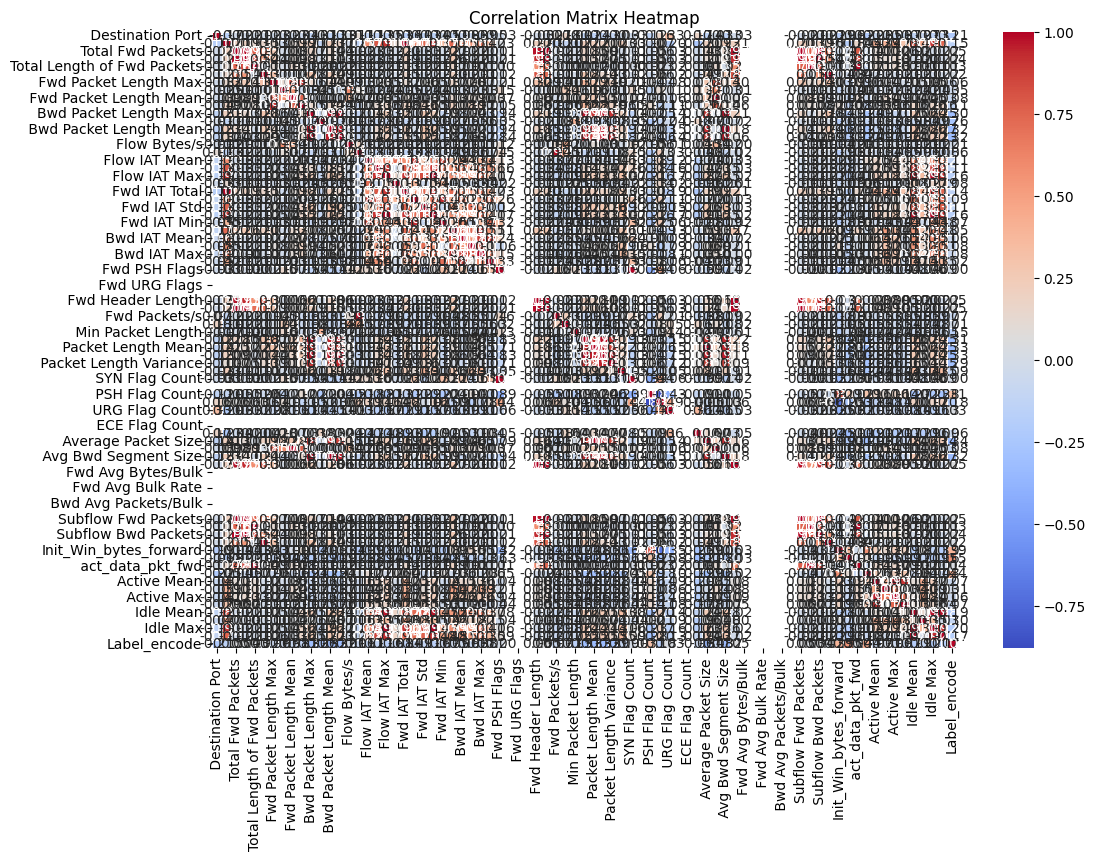

In [48]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [49]:

correlation_with_label = corr_matrix['Label_encode'].drop('Label_encode')

# Take the absolute value of the correlation
abs_correlation_with_label = correlation_with_label.abs()

# Find the column with the lowest correlation
min_correlation_column = abs_correlation_with_label.idxmin()

print(f"The column with the lowest correlation to 'Label_encode' is: {min_correlation_column}")

correlation_dict = {}
for column, correlation in correlation_with_label.items():
  correlation_dict[column] = abs(correlation)


print("Column Correlation with Label_encode:")
for column, correlation in correlation_dict.items():
  print(f"{column}: {correlation}")

The column with the lowest correlation to 'Label_encode' is: Fwd PSH Flags
Column Correlation with Label_encode:
 Destination Port: 0.21097716547630216
 Flow Duration: 0.1457375656614944
 Total Fwd Packets: 0.045769884887217685
 Total Backward Packets: 0.04376776803733321
Total Length of Fwd Packets: 0.03194722588018764
 Total Length of Bwd Packets: 0.01977229857533163
 Fwd Packet Length Max: 0.06072906905475944
 Fwd Packet Length Min: 0.04605242872068178
 Fwd Packet Length Mean: 0.07972203594021304
 Fwd Packet Length Std: 0.11050517627777388
Bwd Packet Length Max: 0.29846577479539405
 Bwd Packet Length Min: 0.2573850376787486
 Bwd Packet Length Mean: 0.32007229249418256
 Bwd Packet Length Std: 0.3170770068748506
Flow Bytes/s: 0.01334622831486932
 Flow Packets/s: 0.06418503031139665
 Flow IAT Mean: 0.11366410647953326
 Flow IAT Std: 0.11011116484860443
 Flow IAT Max: 0.16195612111392088
 Flow IAT Min: 0.07934496504440884
Fwd IAT Total: 0.14144332232613904
 Fwd IAT Mean: 0.0916909353453

In [50]:
# Find columns with correlation less than 0.05 with 'Label_encode'
columns_to_drop = [col for col, corr in correlation_dict.items() if corr < 0.05]

# Drop the columns
df = df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")


Columns dropped: [' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Min', 'Flow Bytes/s', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', ' Bwd Packets/s', ' SYN Flag Count', ' URG Flag Count', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Std']


In [51]:
df = df.apply(pd.to_numeric, errors='coerce')
df.columns[np.isinf(df).any()].tolist()

[' Flow Packets/s']

In [52]:
#replace infinity with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# fill with mean value
df = df.fillna(df.mean())

In [53]:
#filter only columns that contain infinite values
inf_counts = df.apply(lambda x: np.isinf(x).sum())
inf_counts = inf_counts[inf_counts > 0]
inf_counts

,0


In [54]:
X = df.drop(['Label_encode'],axis=1)
y = df['Label_encode']

In [55]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
y_resampled.value_counts()

,count
Label_encode,
0,300
1,300
2,300
3,300
4,300
5,300
6,300
7,300
8,300


In [57]:
X.describe()

,Destination Port,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,...,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3668.000000,3.668000e+03,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3.668000e+03,...,3668.000000,3668.000000,3668.000000,3.668000e+03,3.668000e+03,3.668000e+03,3.668000e+03,3.668000e+03,3.668000e+03,3.668000e+03
mean,2961.137405,2.117521e+07,182.095965,50.378601,55.026957,1249.739913,5.009815,391.067327,530.510424,4.199365e+04,...,15073.544984,4613.391494,29.705562,5.158596e+05,6.468307e+05,3.884855e+05,1.199584e+07,1.714116e+06,1.395696e+07,1.068707e+07
std,10246.392362,3.533928e+07,735.369240,201.162004,163.385475,2676.225861,22.990007,810.741873,1169.333884,1.916046e+05,...,14187.889572,10481.491178,6.118947,1.823346e+06,2.270980e+06,1.635081e+06,2.835184e+07,6.696266e+06,3.004884e+07,2.805687e+07
min,6.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791648e-02,...,-1.000000,-1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,2.460000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.909003e-01,...,256.000000,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,5.174599e+06,8.000000,6.888889,0.000000,6.000000,0.000000,6.000000,0.000000,2.709708e+00,...,8192.000000,235.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,1.240411e+07,231.000000,51.500000,98.363337,531.250000,0.000000,85.781250,217.285736,1.234568e+04,...,29200.000000,247.000000,32.000000,4.000000e+00,4.000000e+00,4.000000e+00,6.088275e+06,0.000000e+00,6.088275e+06,5.715239e+06
max,65129.000000,1.199952e+08,23360.000000,3918.000000,4864.576507,17376.000000,345.000000,4370.686524,6715.738331,2.000000e+06,...,65535.000000,65535.000000,40.000000,3.430000e+07,4.240000e+07,2.620000e+07,1.190000e+08,6.650000e+07,1.190000e+08,1.190000e+08


In [58]:
X.columns

Index([' Destination Port', ' Flow Duration', ' Fwd Packet Length Max',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' CWE Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
     

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = importances.nlargest(50).index.tolist()

print("Top 50 important features:", important_features)

Top 50 important features: [' Destination Port', ' Init_Win_bytes_backward', ' Fwd Packet Length Max', 'Fwd IAT Total', ' min_seg_size_forward', ' Flow IAT Mean', ' Packet Length Mean', 'Init_Win_bytes_forward', ' Flow IAT Max', ' Avg Bwd Segment Size', ' Flow Duration', ' Bwd Packet Length Mean', ' Max Packet Length', ' Fwd IAT Mean', ' Fwd IAT Max', ' Average Packet Size', ' Flow Packets/s', ' Flow IAT Std', ' Fwd IAT Std', ' Packet Length Std', 'Bwd Packet Length Max', ' Fwd Packet Length Mean', ' Fwd IAT Min', ' Flow IAT Min', ' Avg Fwd Segment Size', ' Packet Length Variance', 'Fwd Packets/s', ' Bwd Packet Length Min', 'Bwd IAT Total', ' Fwd Packet Length Std', ' Bwd Packet Length Std', ' Bwd IAT Max', ' Bwd IAT Mean', ' Active Min', ' Bwd IAT Std', ' Min Packet Length', 'Active Mean', ' PSH Flag Count', 'Idle Mean', ' Idle Max', ' ACK Flag Count', ' Idle Min', ' Active Max', ' Down/Up Ratio', ' Idle Std', 'FIN Flag Count', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' R

In [60]:
len(important_features)

50

In [61]:
scaler = StandardScaler()
# Fit and transform X_resampled
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [63]:
model_nn = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Add dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with number of classes
])

# Compile the model with a different optimizer and learning rate
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for more epochs and with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
#Without PCA

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
model_nn.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred = rf.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_prob = model_nn.predict(X_test)
y_pred_nn = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("Random Forest Report")
print(classification_report(y_test, y_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Neural network")
print(classification_report(y_test, y_pred_nn))

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2502 - loss: 2.3187 - val_accuracy: 0.6389 - val_loss: 1.0750
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6333 - loss: 1.1199 - val_accuracy: 0.7722 - val_loss: 0.6811
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6933 - loss: 0.8461 - val_accuracy: 0.7944 - val_loss: 0.5686
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7430 - loss: 0.6910 - val_accuracy: 0.8000 - val_loss: 0.4969
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7878 - loss: 0.5733 - val_accuracy: 0.8083 - val_loss: 0.4554
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7843 - loss: 0.5370 - val_accuracy: 0.8306 - val_loss: 0.4308
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7924 - loss: 0.5221 - val_accuracy: 0.8333 - val_loss: 0.4111
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8078 - loss: 0.4568 - val_accuracy: 0.8528 - val_loss:

In [65]:
print("XGBoost")
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))
print("Random Forest")
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
print("SVM")
print(svm_model.score(X_train,y_train))
print(svm_model.score(X_test,y_test))

XGBoost
1.0
0.9433333333333334
Random Forest
1.0
0.9444444444444444
SVM
0.8666666666666667
0.8677777777777778


In [66]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [68]:
model_nn = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dropout(0.3),  # Add dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with number of classes
])

# Compile the model with a different optimizer and learning rate
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for more epochs and with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
#after PCA

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_pca, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train)
model_nn.fit(X_train_pca, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_pca)
y_pred = rf.predict(X_test_pca)
y_pred_svm = svm_model.predict(X_test_pca)
y_pred_prob = model_nn.predict(X_test_pca)
y_pred_nn = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("Random Forest Report")
print(classification_report(y_test, y_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Neural Network")
print(classification_report(y_test, y_pred_nn))

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2855 - loss: 2.3864 - val_accuracy: 0.7472 - val_loss: 1.0703
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6601 - loss: 1.1100 - val_accuracy: 0.7861 - val_loss: 0.6408
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7164 - loss: 0.7907 - val_accuracy: 0.7972 - val_loss: 0.5229
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7680 - loss: 0.6380 - val_accuracy: 0.8250 - val_loss: 0.4521
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7831 - loss: 0.5597 - val_accuracy: 0.8417 - val_loss: 0.4105
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8099 - loss: 0.5106 - val_accuracy: 0.8417 - val_loss: 0.3910
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8124 - loss: 0.4595 - val_accuracy: 0.8250 - val_loss: 0.3870
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - loss: 0.4452 - val_accuracy: 0.8417 - val_loss

In [70]:
print("XGBoost")
print(xgb_model.score(X_train_pca,y_train))
print(xgb_model.score(X_test_pca,y_test))
print("Random Forest")
print(rf.score(X_train_pca,y_train))
print(rf.score(X_test_pca,y_test))
print("SVM")
print(svm_model.score(X_train_pca,y_train))
print(svm_model.score(X_test_pca,y_test))

XGBoost
0.9902777777777778
0.9377777777777778
Random Forest
1.0
0.9333333333333333
SVM
0.8661111111111112
0.8655555555555555



---------------------XGBoost Matrix-----------------------



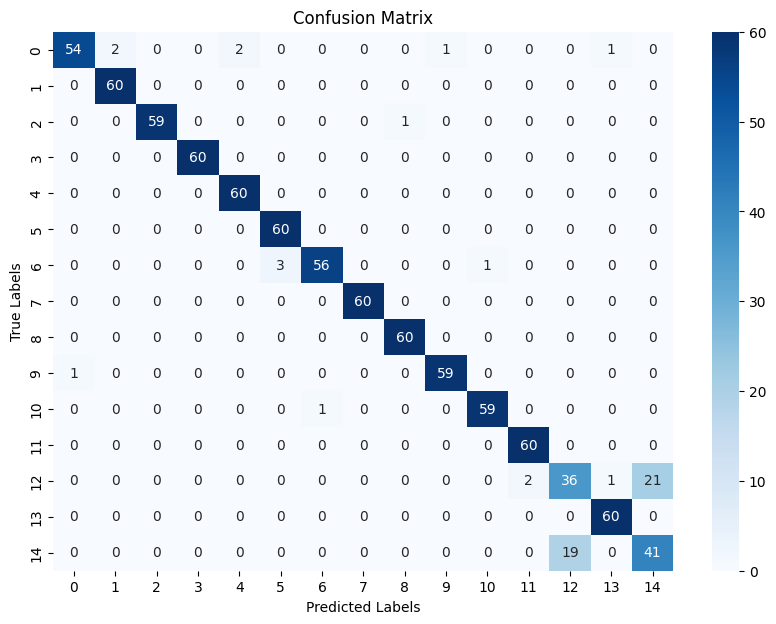


---------------------Random Forest Matrix-----------------------



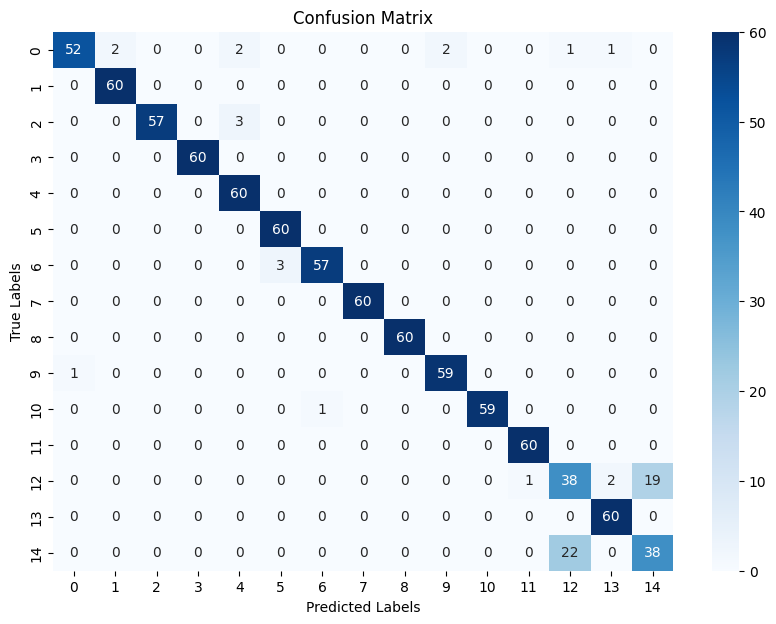


---------------------SVM Matrix-----------------------



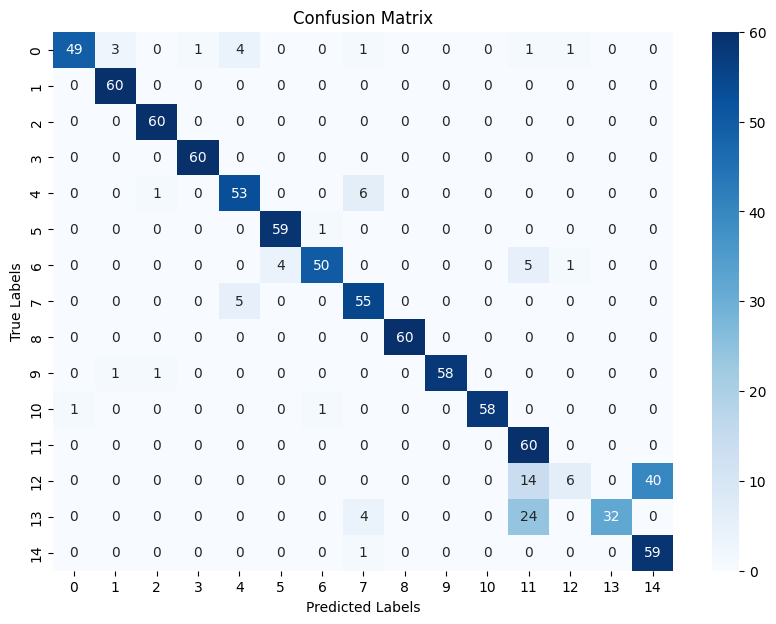


---------------------Neural Network Matrix-----------------------



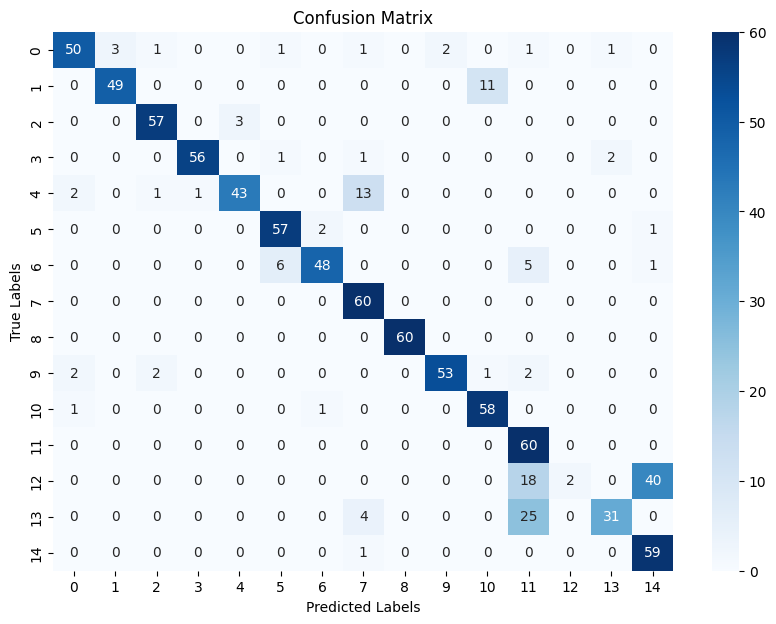

In [72]:
# Generate confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
rf_cm = confusion_matrix(y_test, y_pred)
svm_cm = confusion_matrix(y_test, y_pred_svm)
nn_cm = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix
print("\n---------------------XGBoost Matrix-----------------------\n")
plt.figure(figsize=(10, 7))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("\n---------------------Random Forest Matrix-----------------------\n")
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("\n---------------------SVM Matrix-----------------------\n")
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("\n---------------------Neural Network Matrix-----------------------\n")
plt.figure(figsize=(10, 7))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

In [74]:
# best params found for XGBoost
# Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
# Best score found:  0.9416666666666668

best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
xgb_param_model = xgb.XGBClassifier(best_params, use_label_encoder = False, random_state = 42)

xgb_param_model.fit(X_train_pca,y_train)
y_pred_xgb_param = xgb_param_model.predict(X_test_pca)
print(classification_report(y_test,y_pred_xgb_param))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:12:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.97      1.00      0.98        60
           2       1.00      0.98      0.99        60
           3       1.00      1.00      1.00        60
           4       0.97      1.00      0.98        60
           5       0.95      1.00      0.98        60
           6       0.98      0.93      0.96        60
           7       1.00      1.00      1.00        60
           8       0.98      1.00      0.99        60
           9       0.98      0.98      0.98        60
          10       0.98      0.98      0.98        60
          11       0.97      1.00      0.98        60
          12       0.65      0.60      0.63        60
          13       0.97      1.00      0.98        60
          14       0.66      0.68      0.67        60

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94   

In [75]:
print(xgb_param_model.score(X_train_pca,y_train))
print(xgb_param_model.score(X_test_pca,y_test))

0.9902777777777778
0.9377777777777778


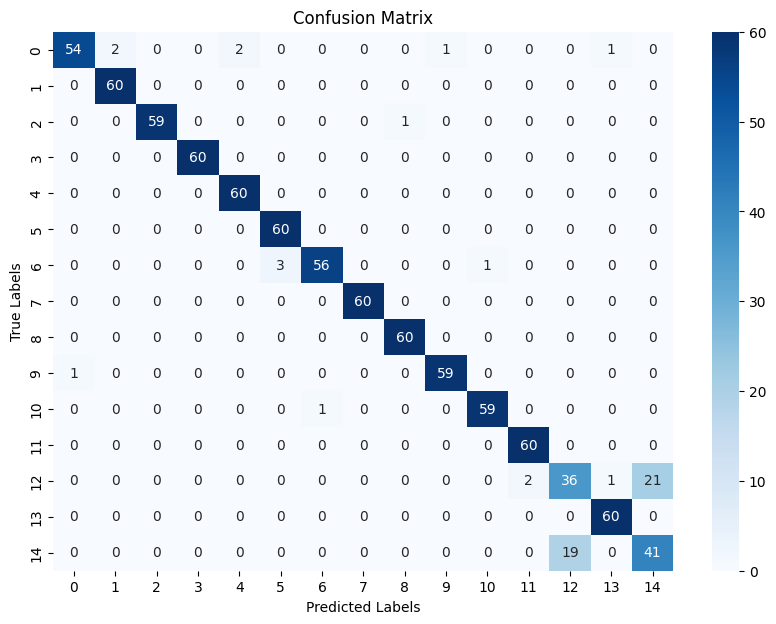

In [76]:
xgb_param_cm = confusion_matrix(y_test,y_pred_xgb_param)

plt.figure(figsize=(10, 7))
sns.heatmap(xgb_param_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()